<a href="https://colab.research.google.com/github/devreborges/projetos_analise_dados/blob/main/an%C3%A1lise_de_dados_projeto_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregando o dataframe

In [2148]:
import pandas as pd
df = pd.read_csv('study_performance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2149]:
mapa = {
    'gender': 'genero',
    'race_ethnicity': 'etnia',
    'parental_level_of_education': 'escolaridade_parental',
    'lunch': 'refeicao',
    'test_preparation_course': 'curso_preparação_teste',
    'math_score': 'pontuacao_matematica',
    'reading_score': 'pontuacao_leitura',
    'writing_score': 'pontuacao_escrita',

}

In [2150]:
df_br = df.copy().rename(columns = mapa)

In [2151]:
df_br.head()

,genero,etnia,escolaridade_parental,refeicao,curso_preparação_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2152]:
df_br.isnull().value_counts()

genero  etnia  escolaridade_parental  refeicao  curso_preparação_teste  pontuacao_matematica  pontuacao_leitura  pontuacao_escrita
False   False  False                  False     False                   False                 False              False                1000
dtype: int64

In [2153]:
df_br.duplicated().value_counts()

False    1000
dtype: int64

# Avaliando variáveis estatísticas pré-tratamento e plotando gráficos para análise

In [2154]:
#média dos valores da pontuação em matemática
print('Média da pontuação em matemática')
pnt_mat = df_br['pontuacao_matematica']
pnt_mat.mean()

Média da pontuação em matemática


66.089

In [2155]:
#mediana dos valores da pontuação em matemática
print('Mediana da pontuação em matemática')
pnt_mat.median()

Mediana da pontuação em matemática


66.0

In [2156]:
#média dos valores da pontuação de leitura
print('Média da pontuação em leitura')
pnt_leitura = df_br['pontuacao_leitura']
pnt_leitura.mean()

Média da pontuação em leitura


69.169

In [2157]:
#mediana dos valores da pontuação em leitura
print('Mediana da pontuação em leitura')
pnt_leitura.median()

Mediana da pontuação em leitura


70.0

In [2158]:
#média dos valores da pontuação em escrita
print('Média da pontuação em escrita')
pnt_escrita = df_br['pontuacao_escrita']
pnt_escrita.mean()

Média da pontuação em escrita


68.054

In [2159]:
#mediana dos valores da pontuação em escrita
print('Mediana da pontuação em scrita')
pnt_escrita.median()

Mediana da pontuação em scrita


69.0

In [2160]:
import matplotlib.pyplot as plt

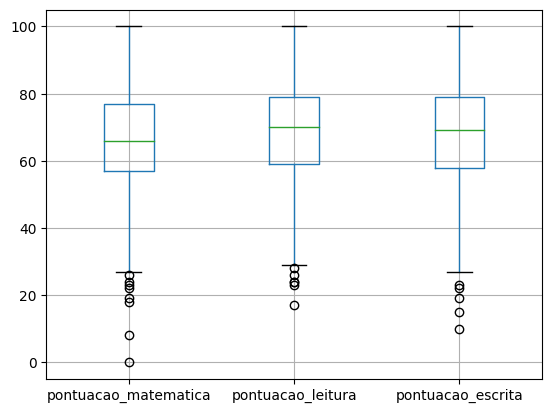

In [2161]:
df_br.boxplot()
plt.show()

# Tratando outliers da pontuação em matemática

Removendo outliers das notas de matemática

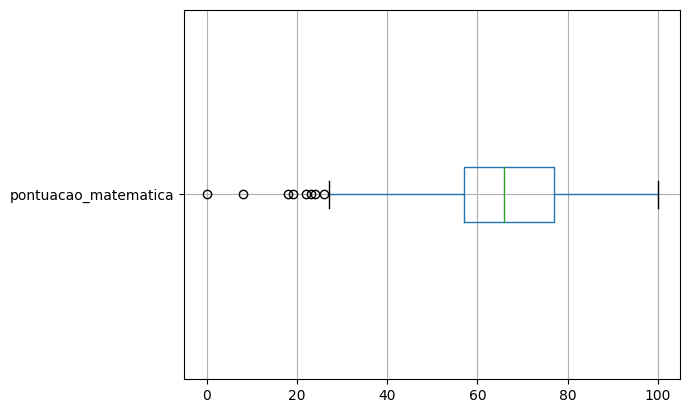

In [2162]:
df_br.boxplot(column='pontuacao_matematica', vert=False)
plt.show()


In [2163]:
#Aplicando estatística básica(quartis e distância interquatil)
Q1 = df_br['pontuacao_matematica'].quantile(.25)
Q3 = df_br['pontuacao_matematica'].quantile(.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [2164]:
outliers_index_mat = (df_br['pontuacao_matematica'] < limite_inferior) | (df_br['pontuacao_matematica'] > limite_superior)
outliers_index_mat.value_counts()

False    992
True       8
Name: pontuacao_matematica, dtype: int64

In [2165]:
outliers = []

for i, value in enumerate(outliers_index_mat):
    if value == True:
        outliers.append(i)

print(outliers)


[17, 59, 145, 338, 466, 787, 842, 980]


In [2166]:
df_br_sem_out = df_br.copy()
df_br_sem_out.drop(outliers, inplace = True)

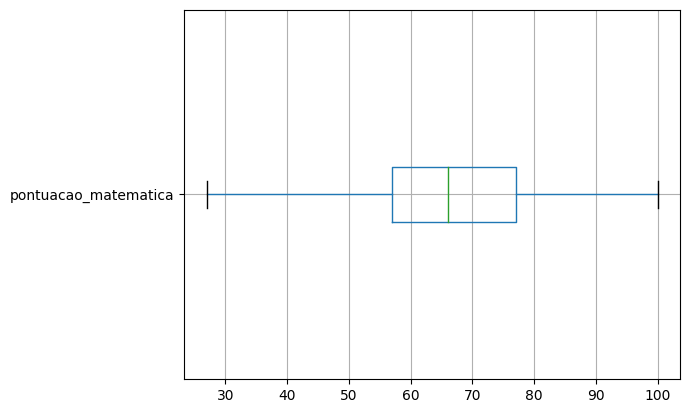

In [2167]:
df_br_sem_out.boxplot(column='pontuacao_matematica', vert=False)
plt.show()

Removendo outliers das notas de leitura

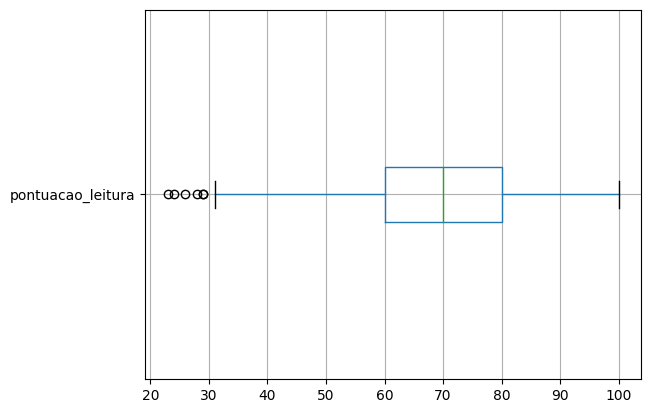

In [2168]:
df_br_sem_out.boxplot(column='pontuacao_leitura', vert=False)
plt.show()


In [2169]:
#Aplicando estatística básica(quartis e distância interquatil)
Q1 = df_br_sem_out['pontuacao_leitura'].quantile(.25)
Q3 = df_br_sem_out['pontuacao_leitura'].quantile(.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [2170]:
outliers_index_leitura = (df_br['pontuacao_leitura'] < limite_inferior) | (df_br['pontuacao_leitura'] > limite_superior)
outliers_index_leitura.value_counts()

False    992
True       8
Name: pontuacao_leitura, dtype: int64

In [2171]:
outliers_leitura = []

for i, value in enumerate(outliers_index_leitura):
    if value == True:
        outliers_leitura.append(i)

print(outliers_leitura)


[59, 76, 211, 327, 596, 601, 896, 980]


In [2172]:
# Verificar quais índices existem no DataFrame
indices_existentes = [indice for indice in outliers_leitura if indice in df_br_sem_out.index]

# Remover apenas os índices existentes do DataFrame
df_br_sem_out.drop(indices_existentes, inplace=True)


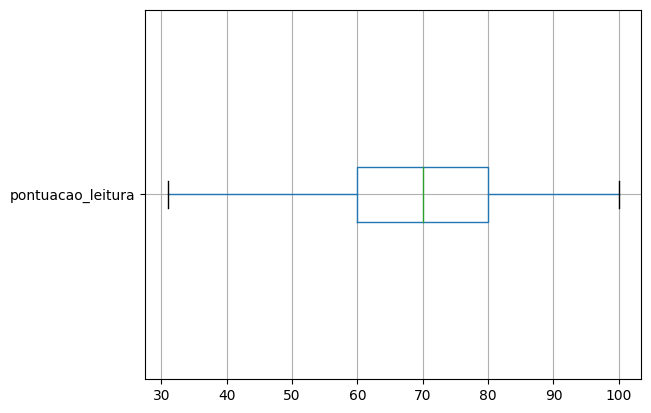

In [2173]:
df_br_sem_out.boxplot(column='pontuacao_leitura', vert=False)
plt.show()

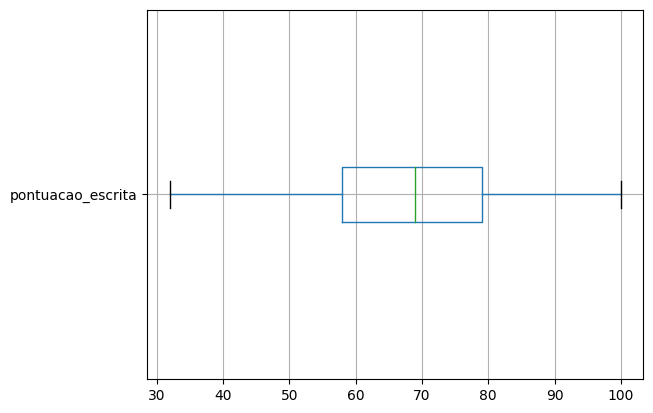

In [2174]:
#chegando se existem outliers em potuações de escrita
df_br_sem_out.boxplot(column='pontuacao_escrita', vert=False)
plt.show()


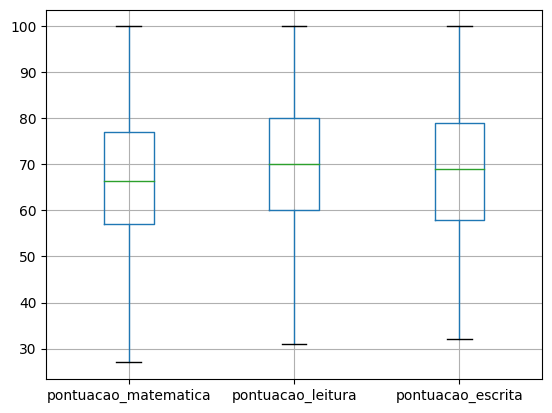

In [2175]:
df_br_sem_out.boxplot()
plt.show()

In [2176]:
#resetando o index do dataframe
df_br_sem_out.reset_index()

,index,genero,etnia,escolaridade_parental,refeicao,curso_preparação_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
981,995,female,group E,master's degree,standard,completed,88,99,95
982,996,male,group C,high school,free/reduced,none,62,55,55
983,997,female,group C,high school,free/reduced,completed,59,71,65
984,998,female,group D,some college,standard,completed,68,78,77


# Análise exploratória dos dados pós-tratamento de dados

In [2177]:
df_br_sem_out.head()

,genero,etnia,escolaridade_parental,refeicao,curso_preparação_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2178]:
#calculando médias
media_mat = df_br_sem_out['pontuacao_matematica'].mean()
media_leitura = df_br_sem_out['pontuacao_leitura'].mean()
media_escrita = df_br_sem_out['pontuacao_escrita'].mean()

#calculando medianas
mediana_mat = df_br_sem_out['pontuacao_matematica'].median()
mediana_leitura = df_br_sem_out['pontuacao_leitura'].median()
mediana_escrita = df_br_sem_out['pontuacao_escrita'].median()

print('A média das notas de matemática é: ' + str(media_mat))
print('A mediana das notas de matemática é: ' + str(mediana_mat))
print('')
print('A média das notas de leitura é: ' + str(media_leitura))
print('A mediana das notas de leitura é: ' + str(mediana_leitura))
print('')
print('A média das notas de escrita é: ' + str(media_escrita))
print('A mediana das notas de escrita é: ' + str(mediana_escrita))





A média das notas de matemática é: 66.6947261663286
A mediana das notas de matemática é: 66.5

A média das notas de leitura é: 69.72312373225152
A mediana das notas de leitura é: 70.0

A média das notas de escrita é: 68.64807302231237
A mediana das notas de escrita é: 69.0


# Analisando o perfil alunos que estão na faixa das 25% melhores pontuações em leitura

In [2179]:
# Ordenar os valores da coluna 'pontuacao_leitura' em ordem decrescente
df_ordenado = df_br_sem_out['pontuacao_leitura'].sort_values(ascending=False)
melhores_notas_leitura = df_ordenado.index[ :int(len(df_ordenado.index) * 0.25)]

In [2180]:
print(f'Temos {len(melhores_notas)} alunos na faixa das 25% melhores notas')

Temos 246 alunos na faixa das 25% melhores notas


In [2181]:
# Selecionar as linhas com índices iguais aos valores em melhores_notas_leitura
melhores_notas = df_br_sem_out.loc[melhores_notas_leitura]

# Imprimir as linhas selecionadas
df_melhores_leitura.head()

,genero,etnia,escolaridade_parental,refeicao,curso_preparação_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
546,female,group A,some high school,standard,completed,92,100,97
381,male,group C,associate's degree,standard,completed,87,100,95
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
594,female,group C,bachelor's degree,standard,completed,92,100,99


In [2182]:
# Contar o número de ocorrências de cada item na coluna 'genero'
contagem_genero = df_melhores_leitura['genero'].value_counts()
contagem_genero

female    165
male       81
Name: genero, dtype: int64

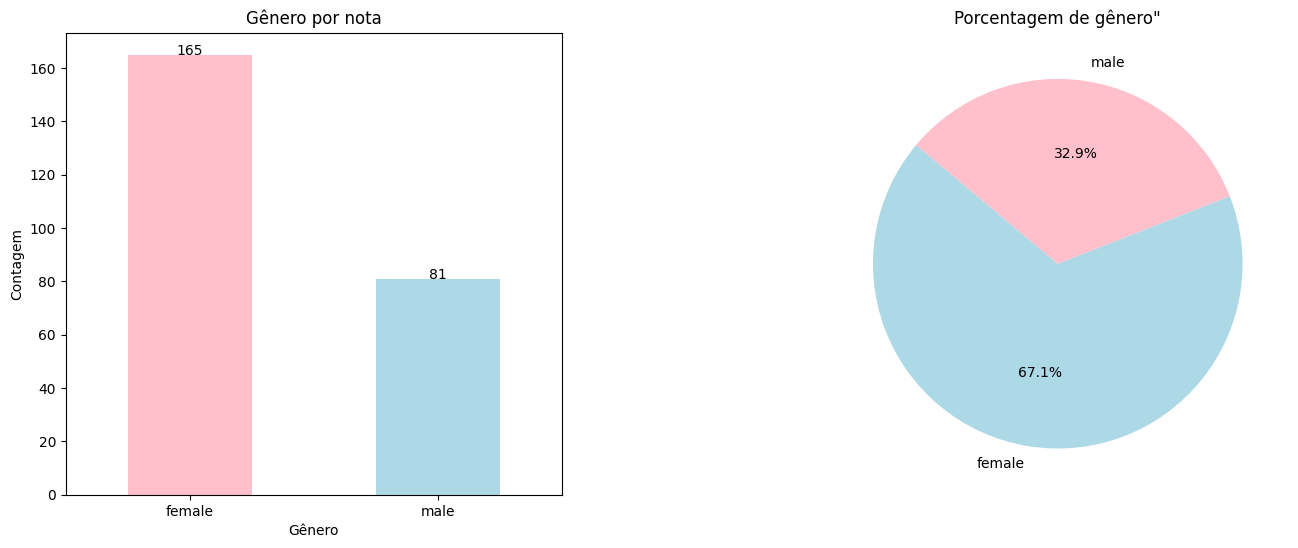

In [2183]:
# Criar uma figura com duas subplots
plt.figure(figsize=(16, 6))  # Ajuste o tamanho da figura conforme necessário

# Subplot para o gráfico de colunas
plt.subplot(1, 2, 1)
cores_genero = ['lightblue' if genero == 'male' else 'pink' for genero in contagem_genero.index]
contagem_genero.plot(kind='bar', color=cores_genero)
plt.title('Gênero por nota')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

# Adicionar números acima de cada barra
for i, v in enumerate(contagem_genero):
    plt.text(i, v + 0.1, str(v), ha='center')

# Subplot para o gráfico de pizza
plt.subplot(1, 2, 2)
cores_pizza = ['lightblue', 'pink']
plt.pie(porcentagem_genero, labels=porcentagem_genero.index, autopct='%1.1f%%', startangle=140, colors=cores_pizza)
plt.title('Porcentagem de gênero"')

# Ajustar o layout para evitar sobreposição e aumentar o espaçamento horizontal
plt.subplots_adjust(wspace=0.5)  # Ajuste o valor conforme necessário para aumentar o espaçamento horizontal

# Exibir os gráficos
plt.show()


A meninas lideram a faixa das 25% melhores notas em leitura, representando 67.1% das melhores notas enquanto os meninos representan 32.9% das notas

In [2184]:
# Contar o número de ocorrências de cada item na coluna refeicao
contagem_refeicao = df_melhores_leitura['refeicao'].value_counts()
contagem_refeicao

standard        191
free/reduced     55
Name: refeicao, dtype: int64

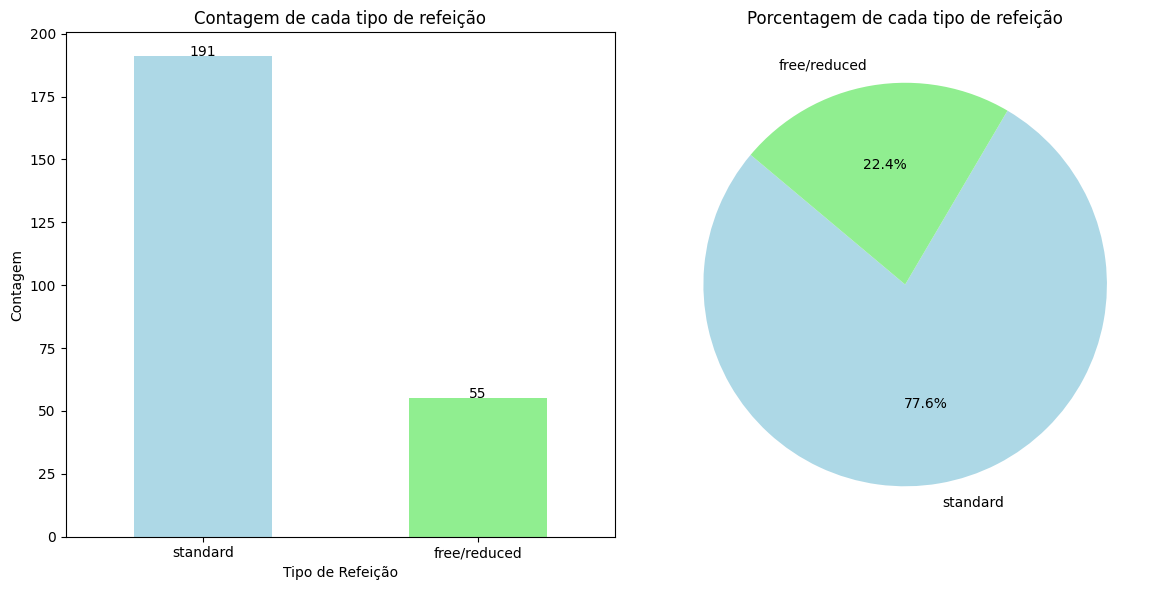

In [2185]:
# Calcular a contagem de cada tipo de refeição
contagem_refeicao = df_melhores_leitura['refeicao'].value_counts()

# Criar uma figura com duas subplots
plt.figure(figsize=(12, 6))

# Cores para as barras e elementos do gráfico de pizza
cores = ['lightblue', 'lightgreen', 'lightcoral']

# Subplot para o gráfico de colunas
plt.subplot(1, 2, 1)
contagem_refeicao.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Contagem de cada tipo de refeição')
plt.xlabel('Tipo de Refeição')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

# Adicionar números acima de cada barra
for i, v in enumerate(contagem_refeicao):
    plt.text(i, v + 0.1, str(v), ha='center')

# Subplot para o gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(contagem_refeicao, labels=contagem_refeicao.index, autopct='%1.1f%%', startangle=140, colors=cores)
plt.title('Porcentagem de cada tipo de refeição')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

Na faixa das 25% melhores notas em leitura, 77.6% dos alunos se alimentam de forma ideal e 22.4% se alimentam como podem.

In [2186]:
 curso_preparação = df_melhores_leitura['curso_preparação_teste'].value_counts()
 curso_preparação

completed    130
none         116
Name: curso_preparação_teste, dtype: int64

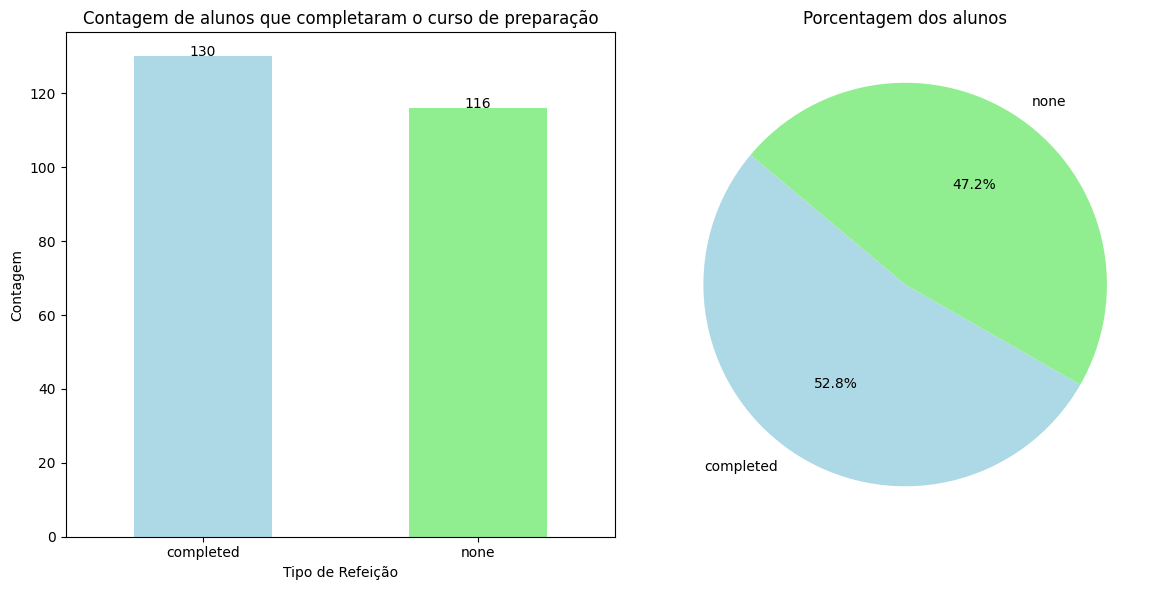

In [2187]:
# Criar uma figura com duas subplots
plt.figure(figsize=(12, 6))

# Subplot para o gráfico de colunas
plt.subplot(1, 2, 1)
curso_preparação.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Contagem de alunos que completaram o curso de preparação')
plt.xlabel('Tipo de Refeição')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

# Adicionar números acima de cada barra
for i, v in enumerate(curso_preparação):
    plt.text(i, v + 0.1, str(v), ha='center')

# Subplot para o gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(curso_preparação, labels=curso_preparação.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Porcentagem dos alunos')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

Na faixa das 25% melhores notas, a alimentação demonstra ser ainda mais importante do que completar o curso de preparação.

# Analisando o perfil alunos que estão na faixa das 25% melhores pontuações em matemática

In [2188]:
# Ordenar os valores da coluna 'pontuacao_matematica' em ordem decrescente
df_ordenado_mat = df_br_sem_out['pontuacao_matematica'].sort_values(ascending=False)
melhores_notas_mat = df_ordenado_mat.index[ :int(len(df_ordenado_mat.index) * 0.25)]

In [2189]:
print(f'Temos {len(melhores_notas_mat)} alunos na faixa das 25% melhores notas')

Temos 246 alunos na faixa das 25% melhores notas


In [2190]:
# Selecionar as linhas com índices iguais aos valores em melhores_notas_leitura
melhores_notas_matematica = df_br_sem_out.loc[melhores_notas_mat]

# Imprimir as linhas selecionadas
melhores_notas_matematica.head()

,genero,etnia,escolaridade_parental,refeicao,curso_preparação_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
962,female,group E,associate's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100


In [2191]:
# Contar o número de ocorrências de cada item na coluna 'genero'
contagem_genero_mat = melhores_notas_matematica['genero'].value_counts()
contagem_genero_mat

male      145
female    101
Name: genero, dtype: int64

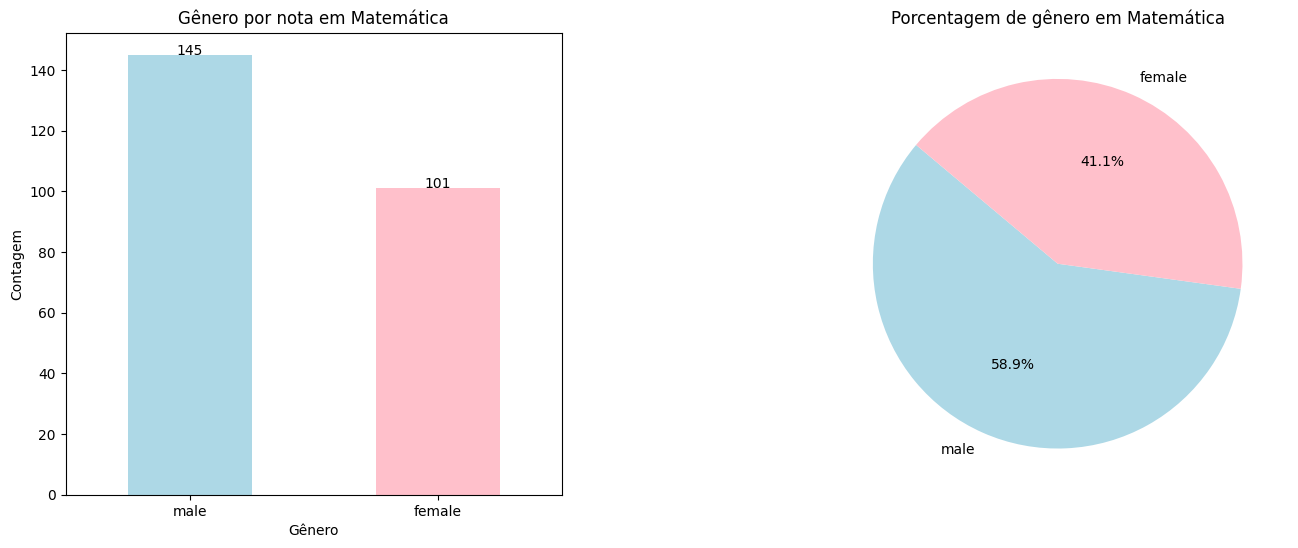

In [2192]:
# Criar uma figura com duas subplots
plt.figure(figsize=(16, 6))  # Ajuste o tamanho da figura conforme necessário

# Cores para os gêneros
cores_genero_mat = ['lightblue' if genero == 'male' else 'pink' for genero in contagem_genero_mat.index]

# Subplot para o gráfico de colunas
plt.subplot(1, 2, 1)
contagem_genero_mat.plot(kind='bar', color=cores_genero_mat)
plt.title('Gênero por nota em Matemática')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

# Adicionar números acima de cada barra
for i, v in enumerate(contagem_genero_mat):
    plt.text(i, v + 0.1, str(v), ha='center')

# Subplot para o gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(contagem_genero_mat, labels=contagem_genero_mat.index, autopct='%1.1f%%', startangle=140, colors=cores_genero_mat)
plt.title('Porcentagem de gênero em Matemática')

# Ajustar o layout para evitar sobreposição e aumentar o espaçamento horizontal
plt.subplots_adjust(wspace=0.5)  # Ajuste o valor conforme necessário para aumentar o espaçamento horizontal

# Exibir os gráficos
plt.show()


A meninos lideram a faixa das 25% melhores notas em matemática, representando 58.9% das melhores notas enquanto os meninos representan 41.1% das notas

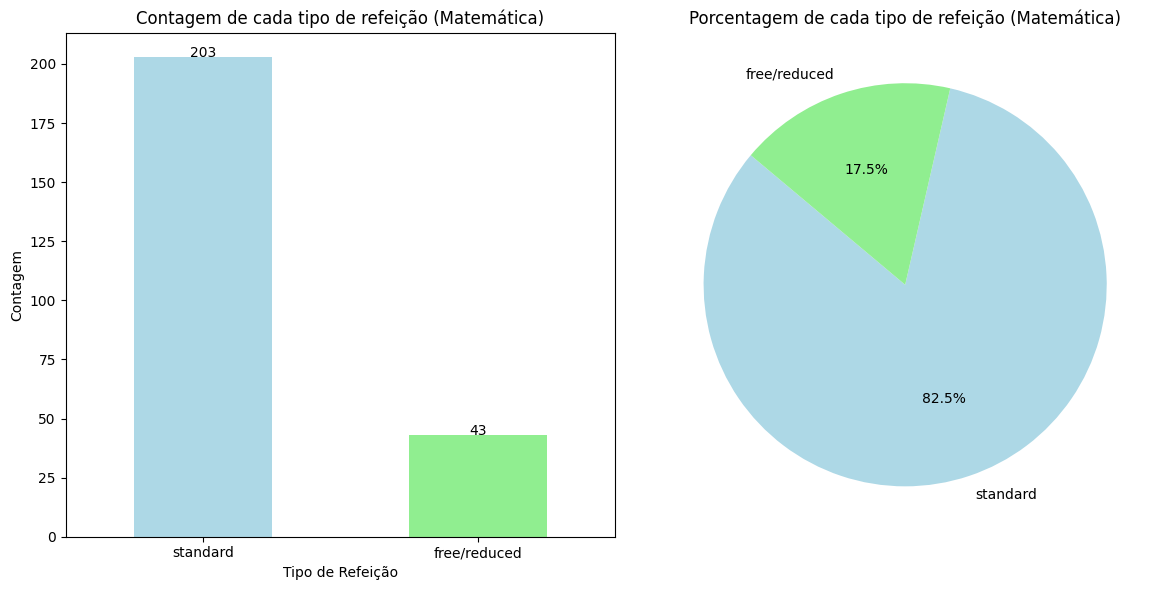

In [2193]:
# Calcular a contagem de cada tipo de refeição
contagem_refeicao_mat = melhores_notas_matematica['refeicao'].value_counts()

# Criar uma figura com duas subplots
plt.figure(figsize=(12, 6))

# Cores para as barras e elementos do gráfico de pizza
cores = ['lightblue', 'lightgreen', 'lightcoral']

# Subplot para o gráfico de colunas
plt.subplot(1, 2, 1)
contagem_refeicao_mat.plot(kind='bar', color=cores)
plt.title('Contagem de cada tipo de refeição (Matemática)')
plt.xlabel('Tipo de Refeição')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

# Adicionar números acima de cada barra
for i, v in enumerate(contagem_refeicao_mat):
    plt.text(i, v + 0.1, str(v), ha='center')

# Subplot para o gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(contagem_refeicao_mat, labels=contagem_refeicao_mat.index, autopct='%1.1f%%', startangle=140, colors=cores)
plt.title('Porcentagem de cada tipo de refeição (Matemática)')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()


Na faixa das 25% melhores notas em matemática, 82.5% dos alunos se alimentam de forma ideal e 17.5% não se alimentam de forma ideal.

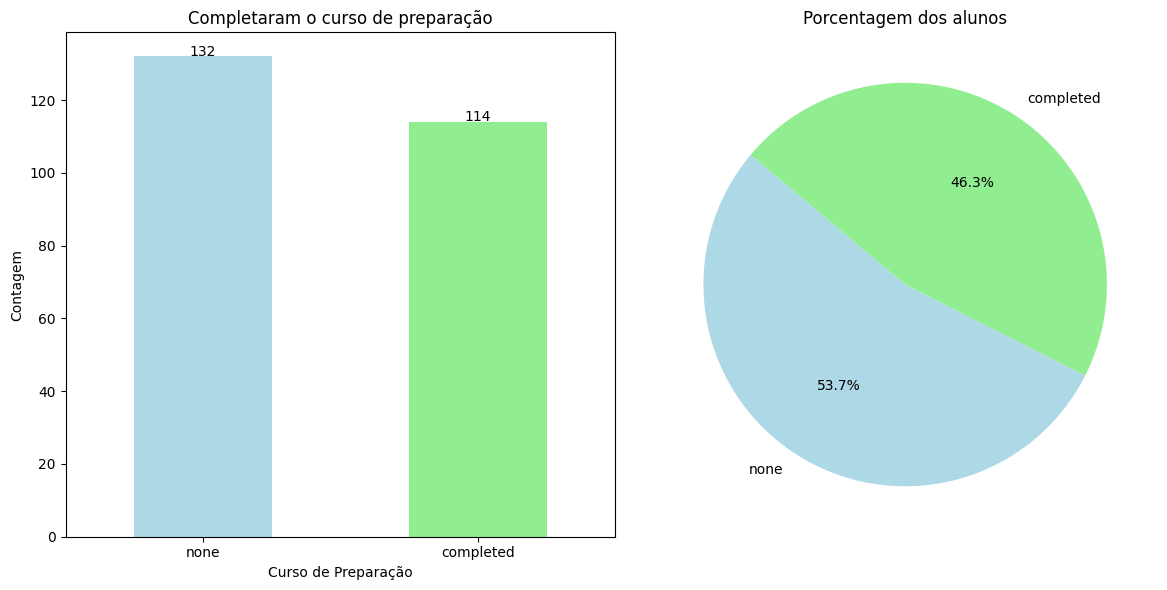

In [2194]:
# Calcular a contagem de alunos que completaram o curso de preparação em matemática
curso_preparação_mat = melhores_notas_matematica['curso_preparação_teste'].value_counts()

# Criar uma figura com duas subplots
plt.figure(figsize=(12, 6))

# Cores para as barras e elementos do gráfico de pizza
cores = ['lightblue', 'lightgreen', 'lightcoral']

# Subplot para o gráfico de colunas
plt.subplot(1, 2, 1)
curso_preparação_mat.plot(kind='bar', color=cores)
plt.title('Completaram o curso de preparação')
plt.xlabel('Curso de Preparação')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

# Adicionar números acima de cada barra
for i, v in enumerate(curso_preparação_mat):
    plt.text(i, v + 0.1, str(v), ha='center')

# Subplot para o gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(curso_preparação_mat, labels=curso_preparação_mat.index, autopct='%1.1f%%', startangle=140, colors=cores)
plt.title('Porcentagem dos alunos')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()


Mais uma vez se alimentar de forma ideal segue sendo mais impactande do quer completar um curso de preparação

# Análise das 25% melhores notas em escrita

In [2195]:
# Analisando o perfil alunos que estão na faixa das 25% melhores pontuações em escrita

# Ordenar os valores da coluna 'pontuacao_escrita' em ordem decrescente
df_ordenado_escrita = df_br_sem_out['pontuacao_escrita'].sort_values(ascending=False)
melhores_notas_escrita = df_ordenado_escrita.index[:int(len(df_ordenado_escrita.index) * 0.25)]

In [2196]:
# Selecionar as linhas com índices iguais aos valores em melhores_notas_escrita
melhores_notas_escrita = df_br_sem_out.loc[melhores_notas_escrita]

# Contar o número de ocorrências de cada item na coluna 'genero'
contagem_genero_escrita = melhores_notas_escrita['genero'].value_counts()

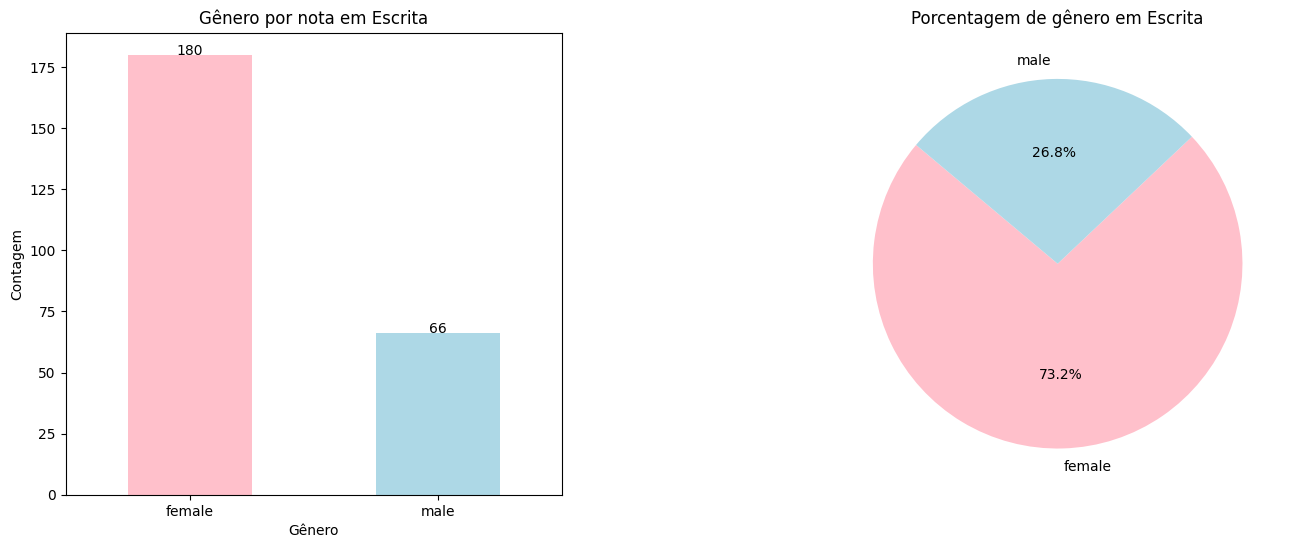

In [2197]:
# Criar uma figura com duas subplots
plt.figure(figsize=(16, 6))  # Ajuste o tamanho da figura conforme necessário

# Cores para os gêneros
cores_genero_escrita = ['lightblue' if genero == 'male' else 'pink' for genero in contagem_genero_escrita.index]

# Subplot para o gráfico de colunas
plt.subplot(1, 2, 1)
contagem_genero_escrita.plot(kind='bar', color=cores_genero_escrita)
plt.title('Gênero por nota em Escrita')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

# Adicionar números acima de cada barra
for i, v in enumerate(contagem_genero_escrita):
    plt.text(i, v + 0.1, str(v), ha='center')

# Subplot para o gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(contagem_genero_escrita, labels=contagem_genero_escrita.index, autopct='%1.1f%%', startangle=140, colors=cores_genero_escrita)
plt.title('Porcentagem de gênero em Escrita')

# Ajustar o layout para evitar sobreposição e aumentar o espaçamento horizontal
plt.subplots_adjust(wspace=0.5)  # Ajuste o valor conforme necessário para aumentar o espaçamento horizontal

# Exibir os gráficos
plt.show()

A meninas lideram a faixa das 25% melhores notas em escrita, representando 73.2% das melhores notas, enquanto os meninos representam 26.8% das notas.


In [2198]:
# Calcular a contagem de cada tipo de refeição
contagem_refeicao_escrita = melhores_notas_escrita['refeicao'].value_counts()


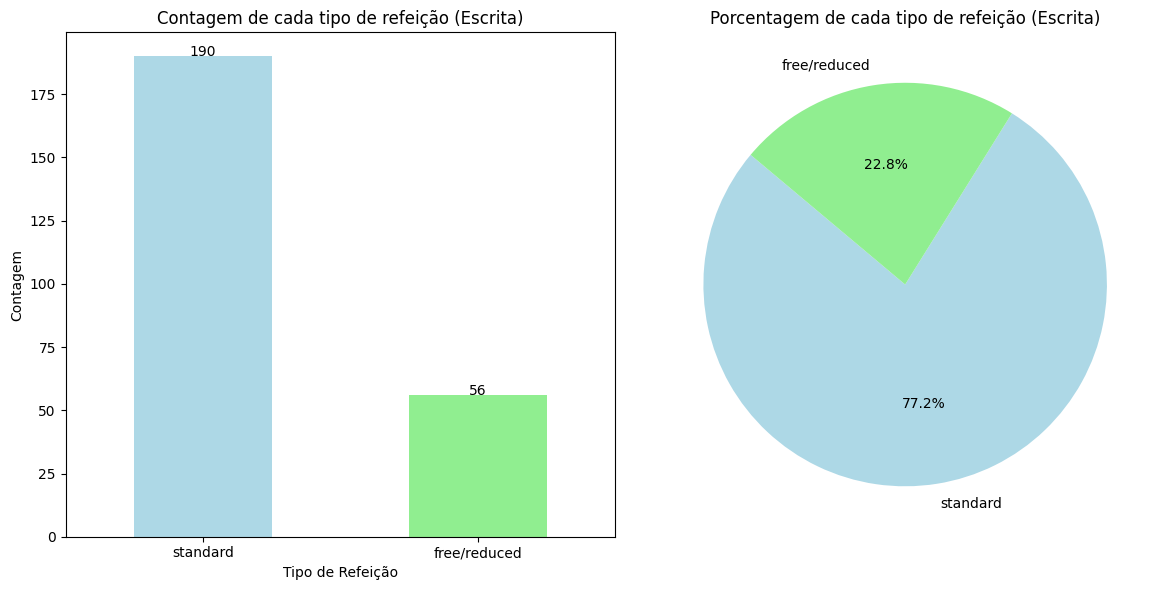

In [2199]:
# Criar uma figura com duas subplots
plt.figure(figsize=(12, 6))

# Cores para as barras e elementos do gráfico de pizza
cores = ['lightblue', 'lightgreen', 'lightcoral']

# Subplot para o gráfico de colunas
plt.subplot(1, 2, 1)
contagem_refeicao_escrita.plot(kind='bar', color=cores)
plt.title('Contagem de cada tipo de refeição (Escrita)')
plt.xlabel('Tipo de Refeição')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

# Adicionar números acima de cada barra
for i, v in enumerate(contagem_refeicao_escrita):
    plt.text(i, v + 0.1, str(v), ha='center')

# Subplot para o gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(contagem_refeicao_escrita, labels=contagem_refeicao_escrita.index, autopct='%1.1f%%', startangle=140, colors=cores)
plt.title('Porcentagem de cada tipo de refeição (Escrita)')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

Na faixa das 25% melhores notas em escrita, 77.2% dos alunos se alimentam bem e 22.8% se alimentam de forma inadequada.


In [2200]:
# Calcular a contagem de alunos que completaram o curso de preparação em escrita
curso_preparação_escrita = melhores_notas_escrita['curso_preparação_teste'].value_counts()

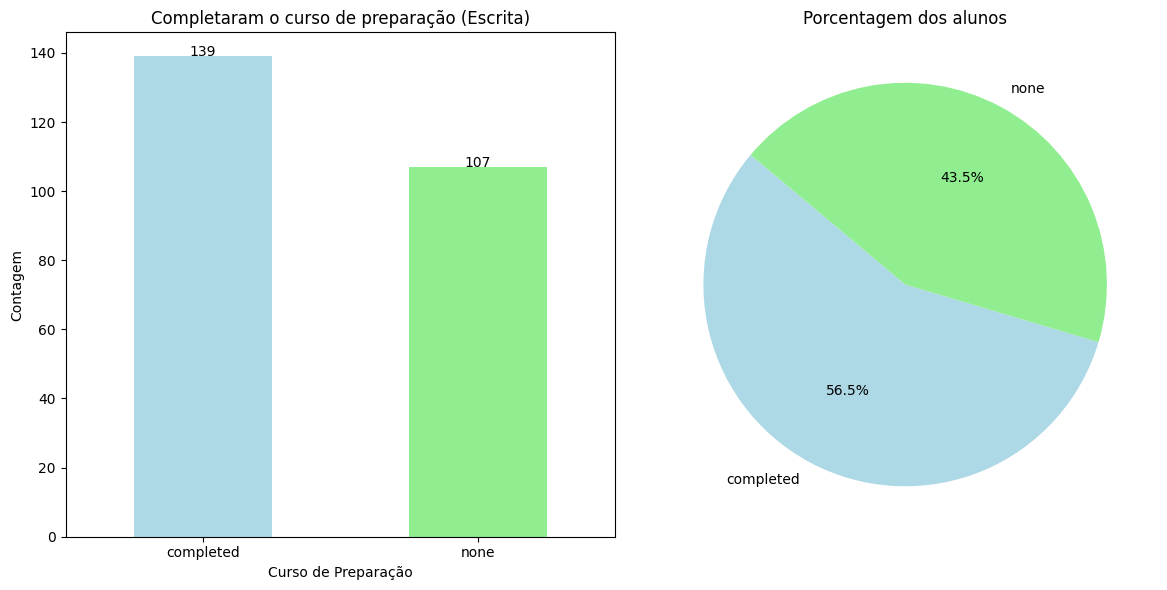

In [2201]:
# Criar uma figura com duas subplots
plt.figure(figsize=(12, 6))

# Cores para as barras e elementos do gráfico de pizza
cores = ['lightblue', 'lightgreen', 'lightcoral']

# Subplot para o gráfico de colunas
plt.subplot(1, 2, 1)
curso_preparação_escrita.plot(kind='bar', color=cores)
plt.title('Completaram o curso de preparação (Escrita)')
plt.xlabel('Curso de Preparação')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

# Adicionar números acima de cada barra
for i, v in enumerate(curso_preparação_escrita):
    plt.text(i, v + 0.1, str(v), ha='center')

# Subplot para o gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(curso_preparação_escrita, labels=curso_preparação_escrita.index, autopct='%1.1f%%', startangle=140, colors=cores)
plt.title('Porcentagem dos alunos')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

Mais uma vez, se alimentar de forma adequada parece ter mais impacto do que completar um curso de preparação.


# Análise por média entre as habilidades

In [2202]:
# Calcular a média das colunas 'pontuacao_matematica', 'pontuacao_leitura' e 'pontuacao_escrita'
df_br_sem_out['media'] = df_br_sem_out[['pontuacao_matematica', 'pontuacao_leitura', 'pontuacao_escrita']].mean(axis=1)
df_br_sem_out.head()

,genero,etnia,escolaridade_parental,refeicao,curso_preparação_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita,media
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [2203]:
# Selecionando as 25% melhores médias
df_ordenado_medias = df_br_sem_out['media'].sort_values(ascending=False)
melhores_medias_indices = df_ordenado_medias.index[:int(len(df_ordenado_medias.index) * 0.25)]

# Adicionando a coluna 'media' apenas para as 25% melhores médias
df_br_sem_out_melhores_medias = df_br_sem_out.loc[melhores_medias_indices]

df_br_sem_out_melhores_medias.head()


,genero,etnia,escolaridade_parental,refeicao,curso_preparação_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita,media
962,female,group E,associate's degree,standard,none,100,100,100,100.000000
458,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
916,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000
114,female,group E,bachelor's degree,standard,completed,99,100,100,99.666667
712,female,group D,some college,standard,none,98,100,99,99.000000


In [2204]:
df_br_sem_out_melhores_medias['escolaridade_parental'].unique()

array(["associate's degree", "bachelor's degree", 'some college',
       'some high school', "master's degree", 'high school'], dtype=object)

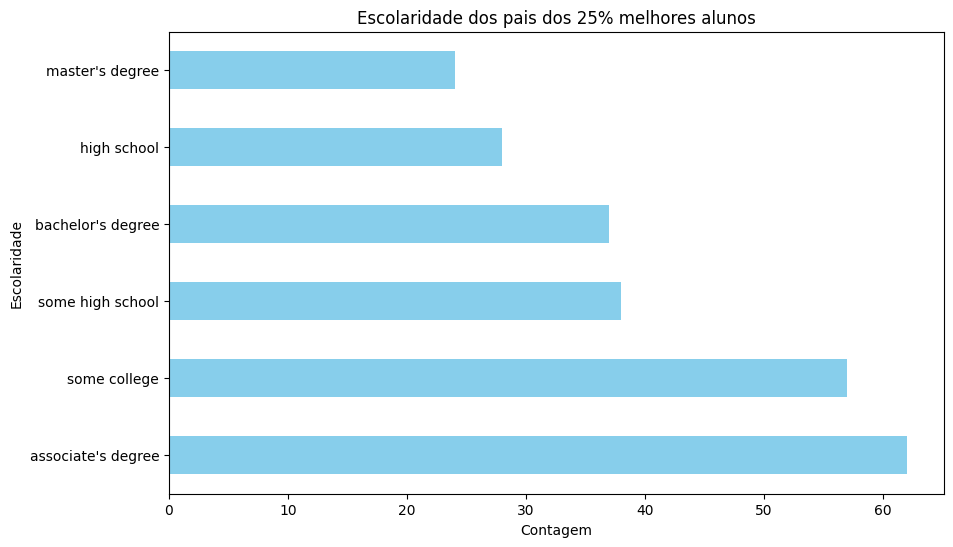

In [2205]:
# Contagem de ocorrências de cada categoria em 'escolaridade_parental'
contagem_escolaridade = df_br_sem_out_25_melhores['escolaridade_parental'].value_counts()

# Plotar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
contagem_escolaridade.plot(kind='barh', color='skyblue')
plt.title('Escolaridade dos pais dos 25% melhores alunos')
plt.xlabel('Contagem')
plt.ylabel('Escolaridade')
plt.show()

Os alunos que possuem familiares graduados possuem as melhores medias

# Previsões sobre o sucesso academico de um aluno, com base nos dados de alimentação, formação parental, preparação e habilidade de leitura.

In [2206]:
df_br_sem_out.head()

,genero,etnia,escolaridade_parental,refeicao,curso_preparação_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita,media
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [2207]:
df_br_sem_out['escolaridade_parental'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [2208]:
df_br_sem_out['refeicao'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [2209]:
df_br_sem_out['curso_preparação_teste'].unique()

array(['none', 'completed'], dtype=object)

In [2210]:
df_machine_learning = df_br_sem_out.copy()

In [2211]:
# Mapeando os valores para substituição na coluna 'escolaridade_parental'
map_escolaridade = {
    "bachelor's degree": 0,
    'some college': 1,
    "master's degree": 2,
    "associate's degree": 3,
    'high school': 4,
    'some high school': 5
}

# Mapeando os valores para substituição na coluna 'curso_preparação_teste'
map_curso_preparacao = {
    'none': 0,
    'completed': 1
}

# Mapeando os valores para substituição na coluna 'refeicao'
map_refeicao = {
    'standard': 0,
    'free/reduced': 1
}

# Mapeando os valores para substituição na coluna 'genero'
map_genero = {
    'female': 0,
    'male': 1
}

# Substituindo os valores nas colunas correspondentes
df_machine_learning['escolaridade_parental'] = df_machine_learning['escolaridade_parental'].replace(map_escolaridade)
df_machine_learning['curso_preparação_teste'] = df_machine_learning['curso_preparação_teste'].replace(map_curso_preparacao)
df_machine_learning['refeicao'] = df_machine_learning['refeicao'].replace(map_refeicao)
df_machine_learning['genero'] = df_machine_learning['genero'].replace(map_genero)


In [2212]:
df_machine_learning.head()

,genero,etnia,escolaridade_parental,refeicao,curso_preparação_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita,media
0,0,group B,0,0,0,72,72,74,72.666667
1,0,group C,1,0,1,69,90,88,82.333333
2,0,group B,2,0,0,90,95,93,92.666667
3,1,group A,3,1,0,47,57,44,49.333333
4,1,group C,1,0,0,76,78,75,76.333333


In [2222]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Separando os dados em variáveis de entrada (X) e saída (y)
x = df_machine_learning[['genero', 'escolaridade_parental', 'refeicao', 'curso_preparação_teste','pontuacao_leitura']]
y = df_machine_learning['media']

# Nesse método, é imprescindível utilizar uma SEED (semente inicial) para alcançar sempre o mesmo resultado, chamando random_state= SEED
# depois dos parâmetros x e y em train_test_split

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state= SEED, test_size = 0.25)
print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_y)} elementos')

# Criando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(treino_x, treino_y)

# Realizando previsões no conjunto de teste
previsoes = modelo.predict(teste_x)

# Calculando o erro quadrático médio (MSE)
mse = mean_squared_error(teste_y, previsoes)

# Calculando a acurácia
acuracia = modelo.score(teste_x, teste_y) * 100

print('O erro quadrático médio (MSE) foi:', mse)
print('A acurácia foi %.2f%%' % acuracia)


Treinaremos com 739 elementos e testaremos com 247 elementos
O erro quadrático médio (MSE) foi: 8.654994086970209
A acurácia foi 95.57%


# Insights do projeto

**1º**: As melhores notas são obtidas pelas meninas em leitura e escrita e pelos meninos em matemática.

**2º**:A ampla maioria dos alunos que estão na faixa de desemepenho das 25% melhores notas se alimentam de forma adequada. A alimentação adequada se provou nesse estudo mais importante do que o curso de preparação.

**3º**: Os alunos com melhores médias possuem familiares com algum diploma acadêmico.

**4º**: Obtivemos um modelo preditivo com 95.57% de acertividade com base no genero, escolaridade parental, alimentação, preparação e pontuação em leitura